In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold,RandomizedSearchCV
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIFA 2018 Statistics.csv')
df

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


In [ ]:
df.columns

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

In [ ]:
df.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


In [ ]:
df.isnull().sum()


Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

In [ ]:
data=df.drop('Own goal Time',axis=1)

In [ ]:
data=data.fillna(0)
data

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,22,0,0,0,Yes,12.0,Group Stage,No,0,0.0
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,10,0,0,0,No,0.0,Group Stage,No,0,0.0
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,12,2,0,0,No,0.0,Group Stage,No,0,0.0
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,6,0,0,0,Yes,89.0,Group Stage,No,0,0.0
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,22,1,0,0,No,0.0,Group Stage,No,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,14,1,0,0,No,5.0,Semi- Finals,No,0,0.0
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,11,1,0,0,Yes,4.0,3rd Place,No,0,0.0
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,5,2,0,0,No,0.0,3rd Place,No,0,0.0
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,14,2,0,0,Yes,18.0,Final,No,0,1.0


In [ ]:
data.isnull().sum()

Date                      0
Team                      0
Opponent                  0
Goal Scored               0
Ball Possession %         0
Attempts                  0
On-Target                 0
Off-Target                0
Blocked                   0
Corners                   0
Offsides                  0
Free Kicks                0
Saves                     0
Pass Accuracy %           0
Passes                    0
Distance Covered (Kms)    0
Fouls Committed           0
Yellow Card               0
Yellow & Red              0
Red                       0
Man of the Match          0
1st Goal                  0
Round                     0
PSO                       0
Goals in PSO              0
Own goals                 0
dtype: int64

In [ ]:
duplicates=data[data.duplicated()]
data=data.drop_duplicates()
duplicates

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals


In [ ]:
data=pd.DataFrame(data)
data

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,22,0,0,0,Yes,12.0,Group Stage,No,0,0.0
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,10,0,0,0,No,0.0,Group Stage,No,0,0.0
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,12,2,0,0,No,0.0,Group Stage,No,0,0.0
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,6,0,0,0,Yes,89.0,Group Stage,No,0,0.0
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,22,1,0,0,No,0.0,Group Stage,No,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,14,1,0,0,No,5.0,Semi- Finals,No,0,0.0
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,11,1,0,0,Yes,4.0,3rd Place,No,0,0.0
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,5,2,0,0,No,0.0,3rd Place,No,0,0.0
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,14,2,0,0,Yes,18.0,Final,No,0,1.0


In [ ]:
le=LabelEncoder()
data['Team']=le.fit_transform(data['Team'])
data['Opponent']=le.fit_transform(data['Opponent'])
data['Round']=le.fit_transform(data['Round'])
data['PSO']=le.fit_transform(data['PSO'])
data['Man of the Match']=le.fit_transform(data['Man of the Match'])
data['Date']=le.fit_transform(data['Date'])

In [ ]:
a=data.head()

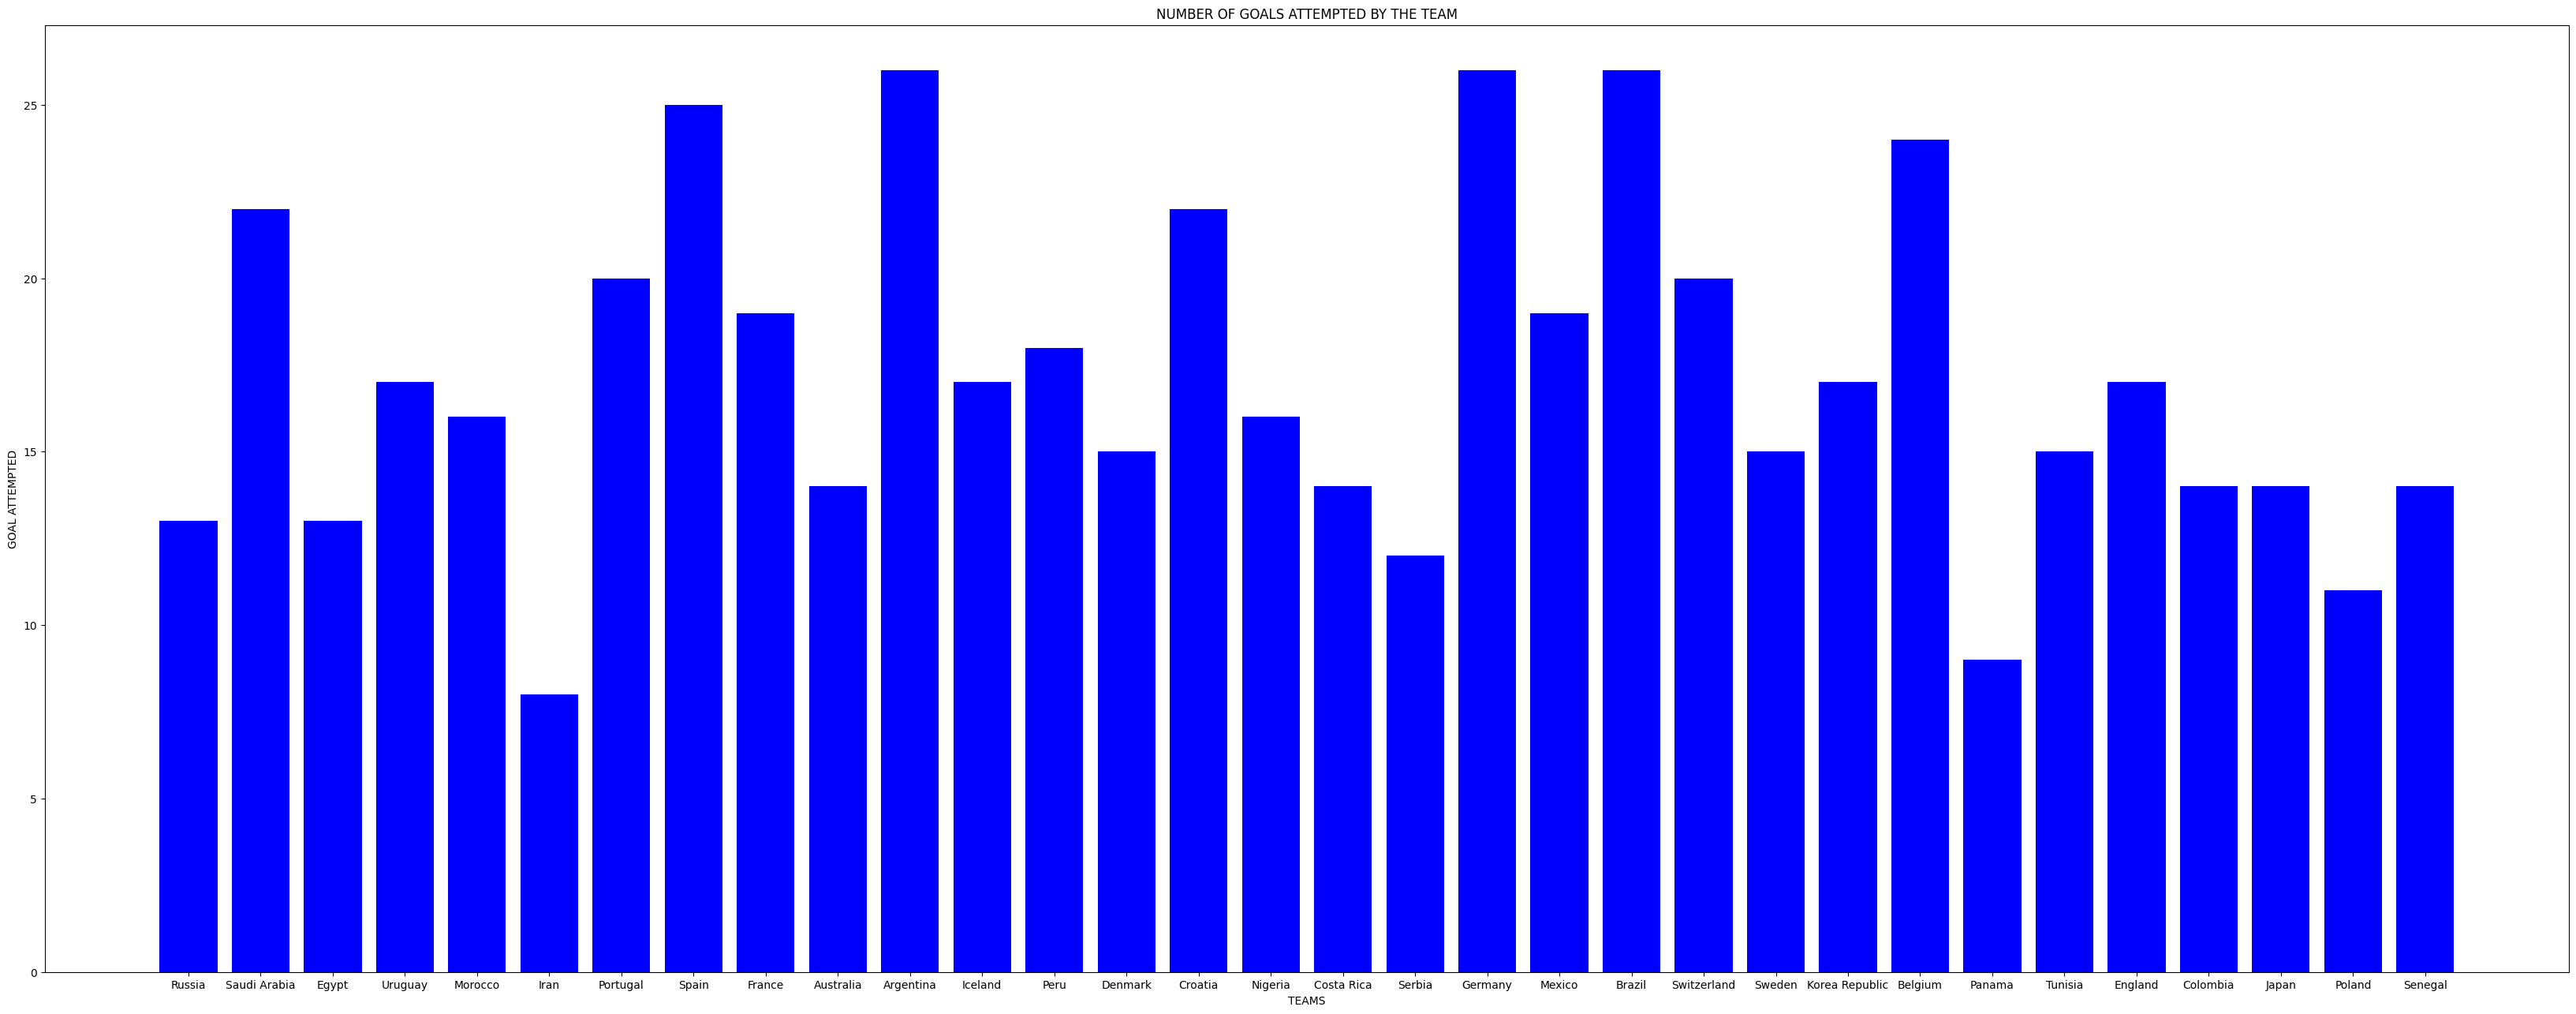

In [ ]:
fig=plt.figure()
ax = fig.add_axes([0,0,5,2.5])
x=df['Team']
y=df['Attempts']
plt.xlabel('TEAMS')
plt.ylabel('GOAL ATTEMPTED')
plt.title('NUMBER OF GOALS ATTEMPTED BY THE TEAM')
ax.bar(x,y,color='b')
plt.show()

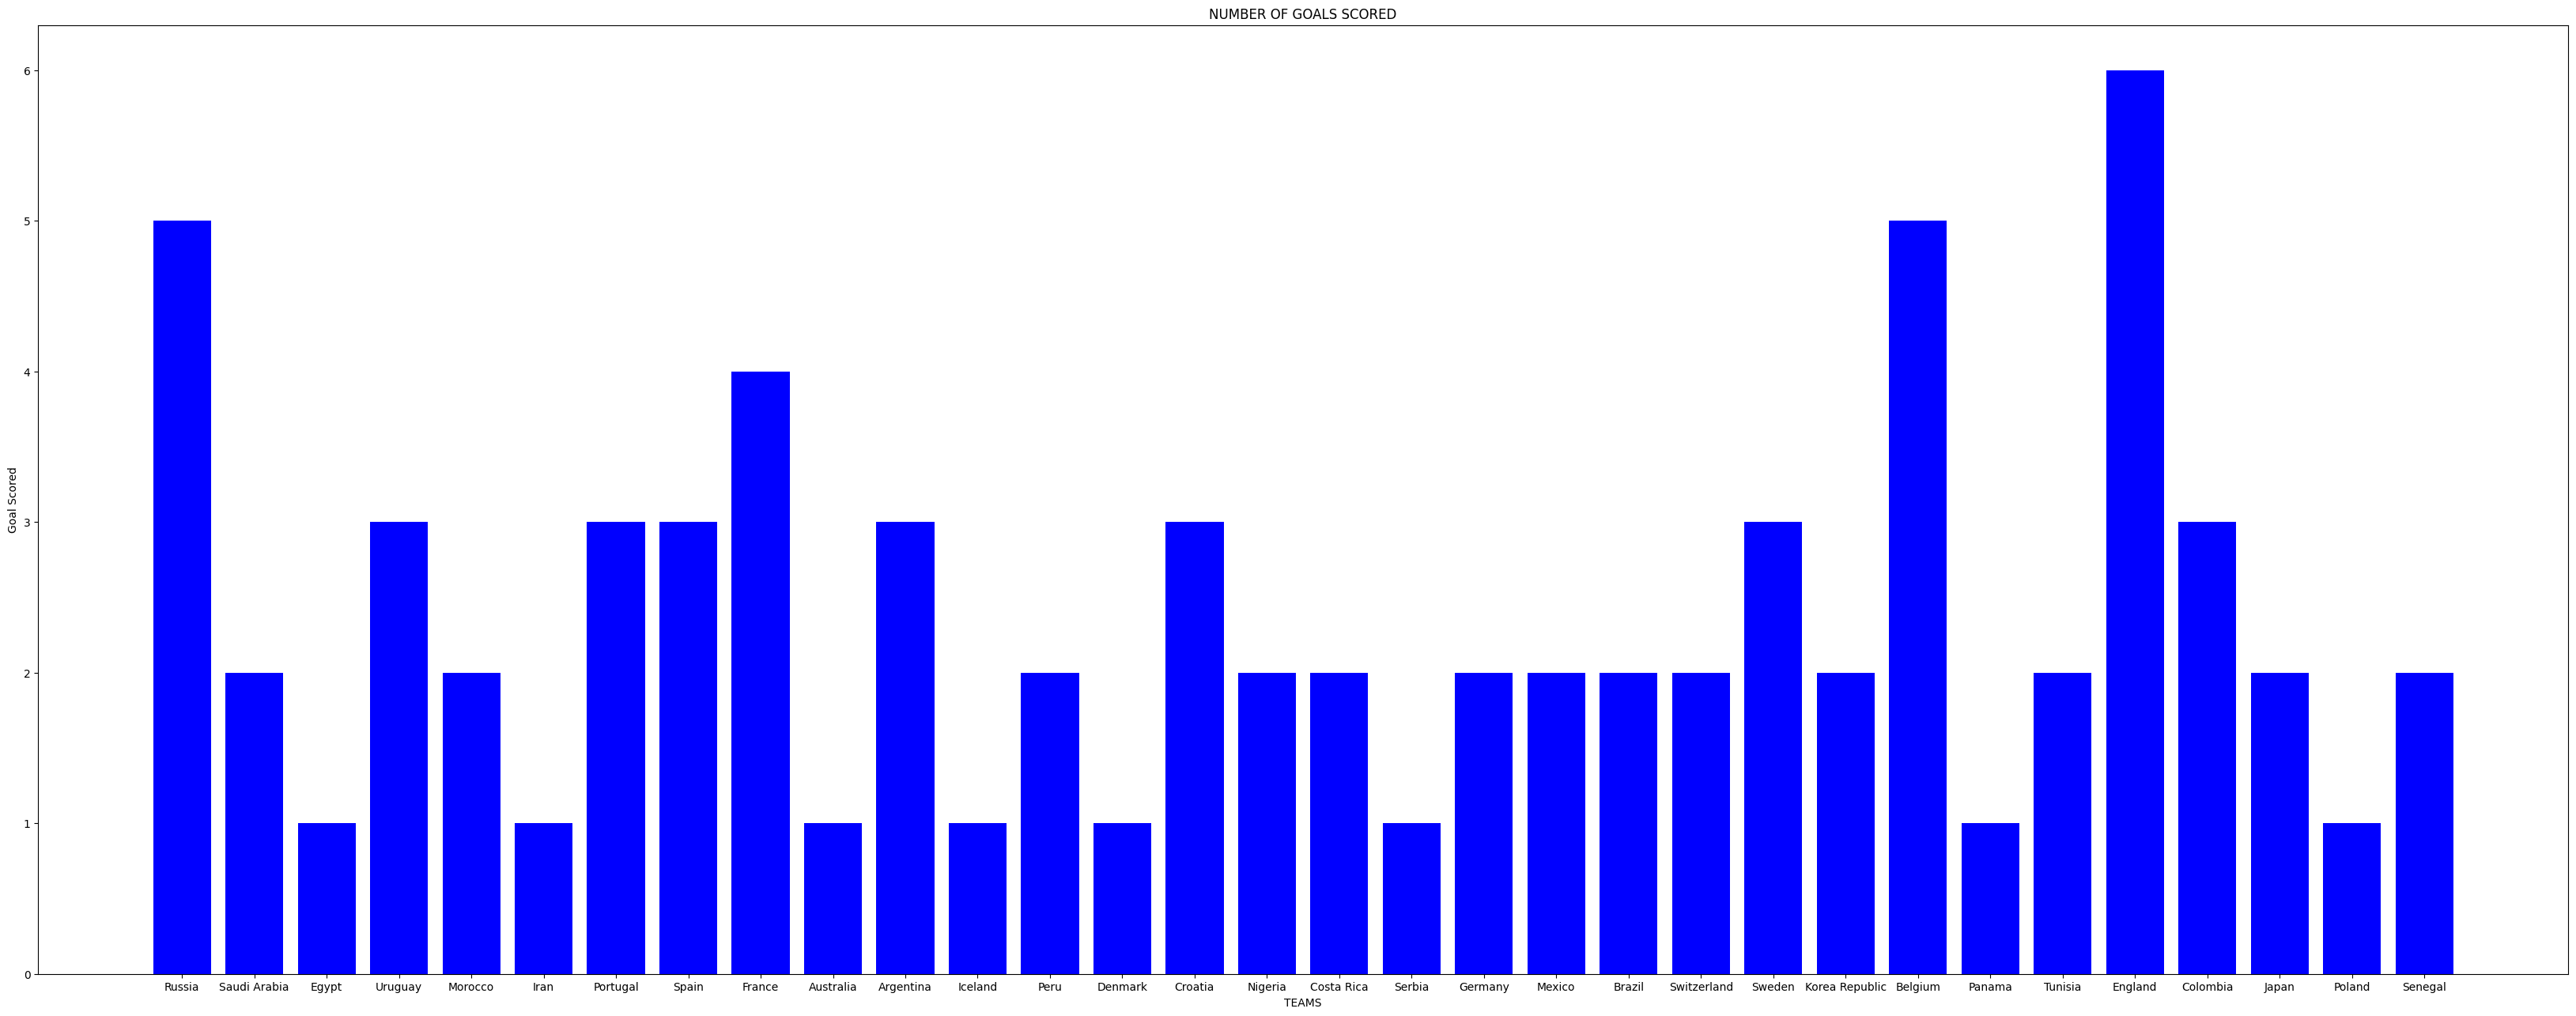

In [ ]:
fig=plt.figure()
ax = fig.add_axes([0,0,5,2.5])
x=df['Team']
y=df['Goal Scored']
plt.xlabel('TEAMS')
plt.ylabel('Goal Scored')
plt.title('NUMBER OF GOALS SCORED')
ax.bar(x,y,color='b')
plt.show()

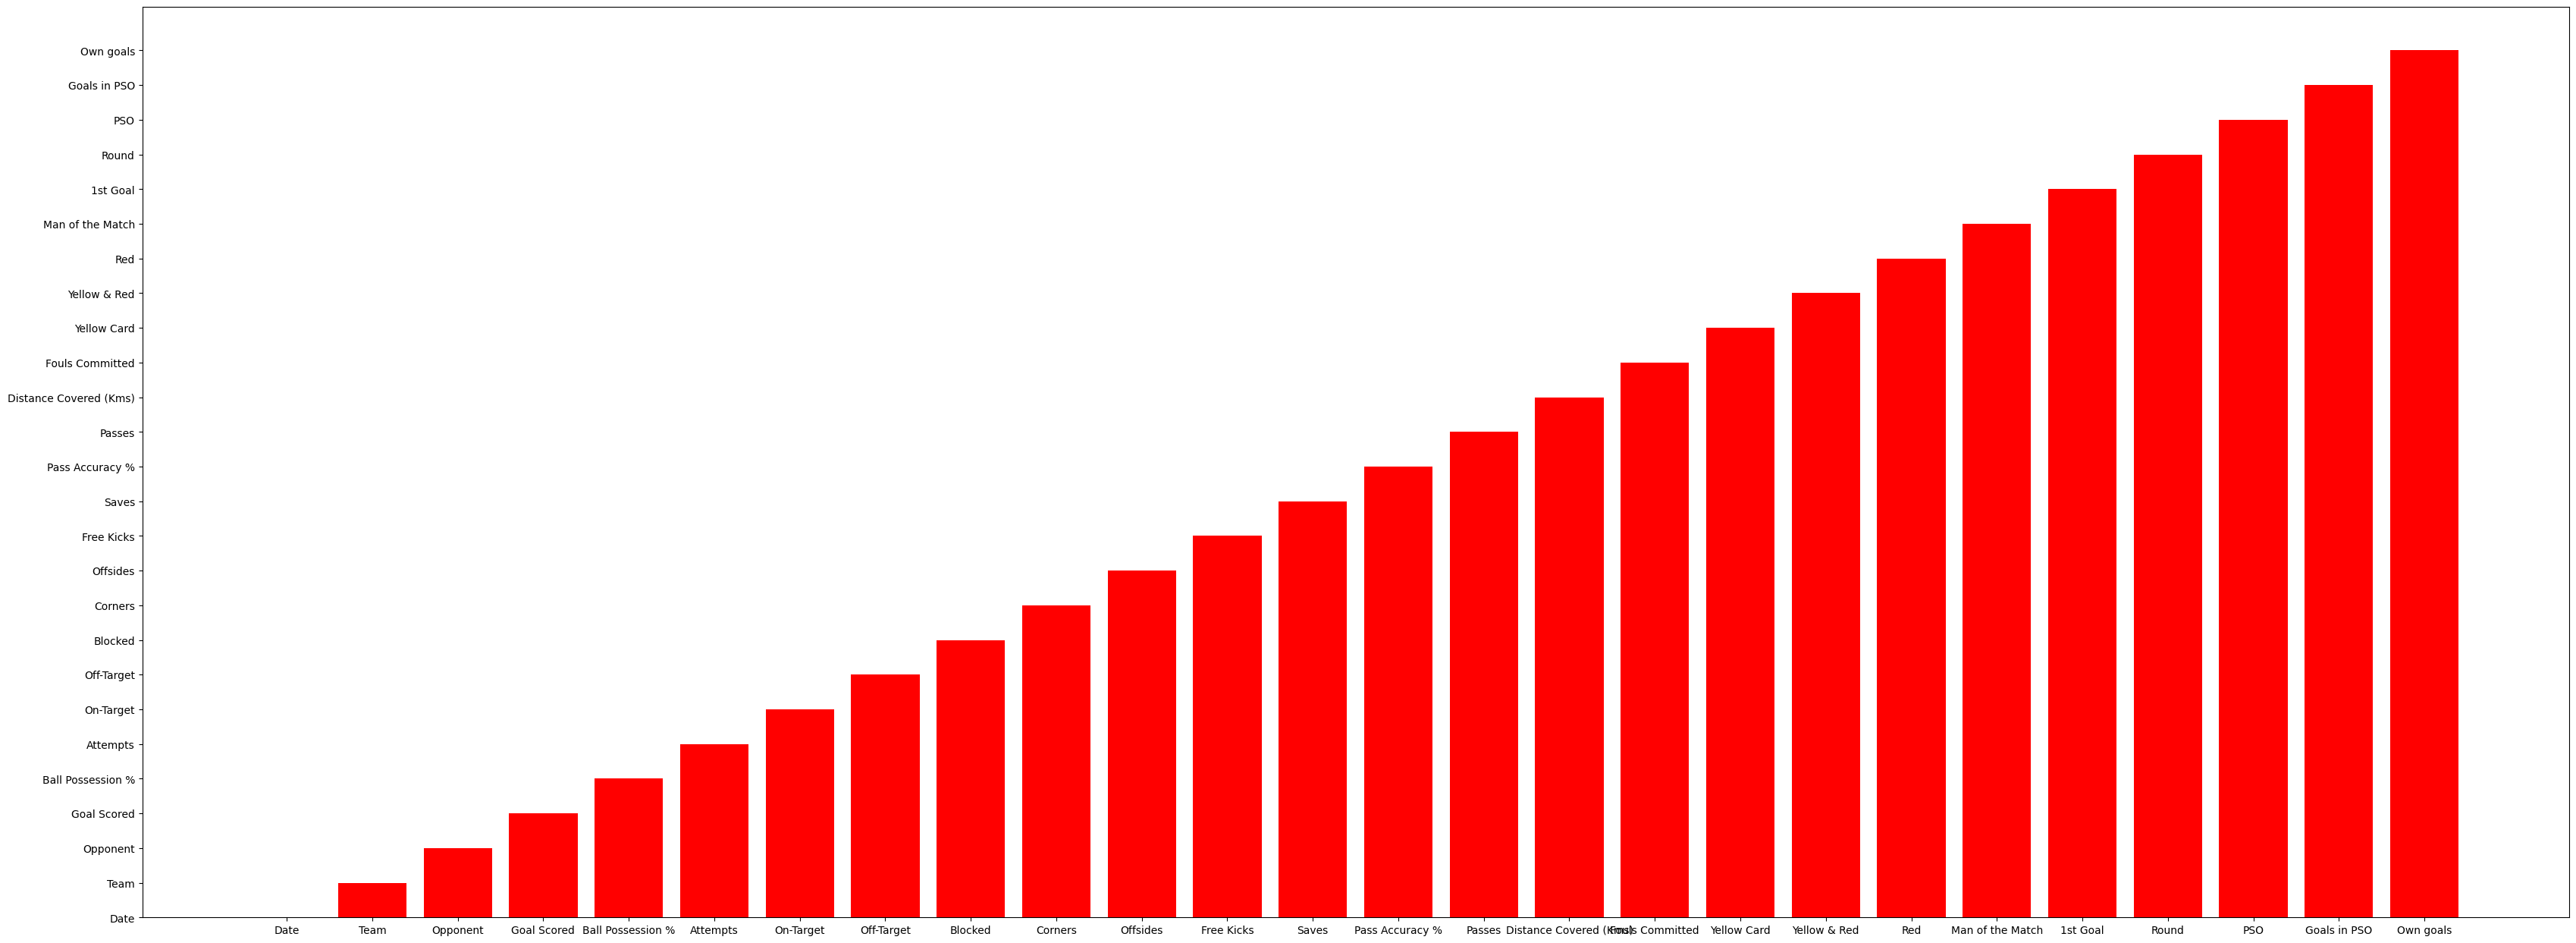

In [ ]:
fig=plt.figure()
ax = fig.add_axes([0,0,5,2.5])
x=list(data.iloc[:0])
y=list(data.iloc[:1])
ax.bar(x,y,color='r')
plt.show()

## **SPLITTING OF DATA**

In [ ]:
X=data.drop("Man of the Match",axis=1)
y = data["Man of the Match"]


# **LOGISTIC** **REGRESSION**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6923076923076923


using parameter to increase accuracy of logistic regression model

In [ ]:
param_grid1 = [{'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]}]

In [ ]:
gs= GridSearchCV(logreg, param_grid = param_grid1, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_gs = gs.fit(X,y)
best_gs.best_estimator_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

LogisticRegression(C=0.08858667904100823, penalty='l1', solver='liblinear')

In [ ]:
print (f'Accuracy - : {best_gs.score(X,y):.3f}')

Accuracy - : 0.742


# **RANDOM FOREST CLASSIFIER**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7307692307692307


appllying hyper parameter tunning to increase accuracy of RFC

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [ ]:
param_grid2 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rfc= GridSearchCV(rf_classifier, param_grid = param_grid2, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_rfc = rfc.fit(X,y)
best_rfc.best_estimator_

Fitting 3 folds for each of 320 candidates, totalling 960 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=2, max_features='auto', min_samples_leaf=2,
                       n_estimators=48)

In [ ]:
print (f'Accuracy - : {best_rfc.score(X,y):.3f}')

Accuracy - : 0.805


#**DECISSION TREE CLASSIFIER**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5641025641025641


In [ ]:
parameters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
             }

In [ ]:
DT_grid  = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 5, verbose = True)

In [ ]:
best_dt=DT_grid.fit(X_train,y_train)
DT_grid.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

DecisionTreeClassifier(max_depth=5, max_features='log2', min_samples_split=6)

In [ ]:
print (f'Accuracy - : {best_dt.score(X,y):.3f}')

Accuracy - : 0.805


# **K NEAREST NEIGHBOUR**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6153846153846154


In [ ]:
knn_params = {"n_neighbors":range(1,30,2),
              "weights":["uniform","distance"],
              "metric":["euclidean","manhattan","minkowski"],
              "algorithm":["auto","ball_tree","kd_tree","brute"],
              "leaf_size":range(1,50,5)
              }

In [ ]:
grid_search=GridSearchCV(knn_classifier, param_grid = knn_params, cv = 3, verbose=True, n_jobs=-1)
grid_results=grid_search.fit(X,y)
grid_search.best_estimator_

Fitting 3 folds for each of 3600 candidates, totalling 10800 fits


KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=3)

In [ ]:
print(f'Accuracy - : {grid_results.score(X,y):.3f}')

Accuracy - : 0.789


# **SUPPORT VECTOR CLASSIFIER**

In [ ]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4807692307692308


In [ ]:
param_grid4={'C':[0.1,1,10,100],
            'gamma':[1,0.1,0.01,0.001],
            'kernel':['rbf']}

In [ ]:
svc_grid  = RandomizedSearchCV(SVC(gamma='auto'), param_distributions = param_grid4, cv = 3, verbose=2,n_jobs=4)

In [ ]:
svc_grid.fit(X,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(gamma='auto'), n_jobs=4,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf']},
                   verbose=2)

In [ ]:
svc_grid.best_params_
svc_grid.best_estimator_

SVC(C=1, gamma=0.001)

In [ ]:
print(f'Accuracy - : {svc_grid.score(X,y):.3f}')

Accuracy - : 0.922


# **GAUSSIAN NAIVE BAYES**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6346153846153846


In [ ]:
param_grid={'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid_search=GridSearchCV(gnb, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
grid_results=grid_search.fit(X,y)
grid_search.best_estimator_

In [ ]:
print(f'Accuracy - : {grid_search.score(X,y):.3f}')

Accuracy - : 0.766
